# Scraping de Características Generales

Se obtienen características generales del equipo de la página whoscored.
Las estadísticas son de la temporada más reciente.


![alt text](generales.png)

In [1]:
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.common.exceptions import TimeoutException

from selenium.webdriver.support.ui import Select


ModuleNotFoundError: No module named 'selenium'

In [2]:
option = webdriver.ChromeOptions()
option.add_argument(" — incognito")

In [3]:
browser = webdriver.Chrome(executable_path='./chromedriver',
                           chrome_options=option)

In [4]:
team_links = [
    'https://es.whoscored.com/Teams/326/Archive/Rusia-Russia',
    'https://es.whoscored.com/Teams/967/Archive/Uruguay-Uruguay',
    'https://es.whoscored.com/Teams/340/Archive/Portugal-Portugal',
    'https://es.whoscored.com/Teams/338/Archive/Espa%C3%B1a-Spain',
    'https://es.whoscored.com/Teams/1293/Archive/Ir%C3%A1n-Iran',
    'https://es.whoscored.com/Teams/341/Archive/Francia-France',
    'https://es.whoscored.com/Teams/328/Archive/Australia-Australia',
    'https://es.whoscored.com/Teams/416/Archive/Per%C3%BA-Peru',
    'https://es.whoscored.com/Teams/425/Archive/Dinamarca-Denmark',
    'https://es.whoscored.com/Teams/346/Archive/Argentina-Argentina',
    'https://es.whoscored.com/Teams/770/Archive/Islandia-Iceland',
    'https://es.whoscored.com/Teams/337/Archive/Croacia-Croatia',
    'https://es.whoscored.com/Teams/977/Archive/Nigeria-Nigeria',
    'https://es.whoscored.com/Teams/409/Archive/Brasil-Brazil',
    'https://es.whoscored.com/Teams/423/Archive/Suiza-Switzerland',
    'https://es.whoscored.com/Teams/970/Archive/Costa-Rica-Costa-Rica',
    'https://es.whoscored.com/Teams/336/Archive/Alemania-Germany',
    'https://es.whoscored.com/Teams/972/Archive/M%C3%A9xico-Mexico',
    'https://es.whoscored.com/Teams/344/Archive/Suecia-Sweden',
    'https://es.whoscored.com/Teams/1159/Archive/Corea-Del-sur-South-Korea',
    'https://es.whoscored.com/Teams/339/Archive/B%C3%A9lgica-Belgium',
    'https://es.whoscored.com/Teams/959/Archive/T%C3%BAnez-Tunisia',
    'https://es.whoscored.com/Teams/345/Archive/Inglaterra-England',
    'https://es.whoscored.com/Teams/342/Archive/Polonia-Poland',
    'https://es.whoscored.com/Teams/957/Archive/Senegal-Senegal',
    'https://es.whoscored.com/Teams/408/Archive/Colombia-Colombia',
    'https://es.whoscored.com/Teams/986/Archive/Japan-Japan'
]

In [5]:
def wait_browser(browser, load_xpath, timeout=20):
    try:
        WebDriverWait(browser, timeout).until(
            EC.visibility_of_element_located(
                (By.XPATH, load_xpath)))
    except TimeoutException:
        print("Timed out waiting for page to load")
        browser.quit()

In [6]:
import pandas as pd

data = []

for team_link in team_links:
    team_data = {}
    
    browser.get(team_link)
    wait_browser(browser, '//a[@class="team-link"]')    
    team_data['Equipo'] = browser.find_element_by_xpath('//a[@class="team-link"]').text
    sidebox = browser.find_element_by_xpath('//div[@class="team-profile-side-box"]')
    team_data['rating'] = sidebox.find_element_by_xpath('//div[@class="rating"]').text  
    
    
    stats_container = browser.find_element_by_xpath('//div[@class="stats-container"]')
    labels = stats_container.find_elements_by_tag_name('dt')
    values = stats_container.find_elements_by_tag_name('dd')
    for l, v in zip(labels, values):
        team_data[l.text] = v.text
        
    data.append(team_data)
    
df = pd.DataFrame(data)
df.head()

,Campeonato,Disciplina,Entradas por partido,Equipo,Goles por partido,Pm Posesión,Precisión de Pase,Regates por partido,Temporada,Tiros por partido,rating
0,European Championship,20,"15,3",Russia,"0,7","51,3%","81,5%",4,2016,11,"6,43"
1,Copa America,92,"25,5",Uruguay,"0,5","42,2%","69,4%","6,5",2015,"10,8","6,70"
2,European Championship,130,"14,9",Portugal,"1,3","51,5%","83,7%","10,6",2016,"17,6","6,92"
3,European Championship,50,"8,3",Spain,"1,3","61,9%",89%,6,2016,"16,3","6,72"
4,FIFA World Cup,40,21,Iran,"0,3","35,5%","69,8%","5,3",2014,8,"6,62"


In [7]:
df

,Campeonato,Disciplina,Entradas por partido,Equipo,Goles por partido,Pm Posesión,Precisión de Pase,Regates por partido,Temporada,Tiros por partido,rating
0,European Championship,20,"15,3",Russia,"0,7","51,3%","81,5%",4,2016,11,"6,43"
1,Copa America,92,"25,5",Uruguay,"0,5","42,2%","69,4%","6,5",2015,"10,8","6,70"
2,European Championship,130,"14,9",Portugal,"1,3","51,5%","83,7%","10,6",2016,"17,6","6,92"
3,European Championship,50,"8,3",Spain,"1,3","61,9%",89%,6,2016,"16,3","6,72"
4,FIFA World Cup,40,21,Iran,"0,3","35,5%","69,8%","5,3",2014,8,"6,62"
5,European Championship,130,"17,9",France,"1,9","54,3%","85,4%","12,7",2016,"17,7","7,11"
6,FIFA World Cup,60,"12,3",Australia,1,"44,3%","79,7%","10,3",2014,9,"6,39"
7,Copa America,151,"19,3",Peru,"1,3","47,4%","78,9%","11,8",2015,"12,7","6,82"
8,European Championship,40,"13,3",Denmark,"1,3","48,5%","83,4%",5,2012,9,"6,84"
9,Copa America,150,"19,3",Argentina,"1,7",59%,85%,"16,5",2015,"14,8","7,11"


In [8]:
df.to_csv("características_equipos.csv", index=False)

# Procesamiento de datos de equipos


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df = pd.read_csv("características_equipos.csv")

In [40]:
df['rating'] = df['rating'].apply(lambda x: x.replace(',', '.')).astype(float)

In [41]:
x = range(len(df['rating']))

In [42]:
df = df.sort_values('rating')

([<matplotlib.axis.YTick at 0x7f1e4591d0f0>,
 <a list of 27 Text yticklabel objects>)

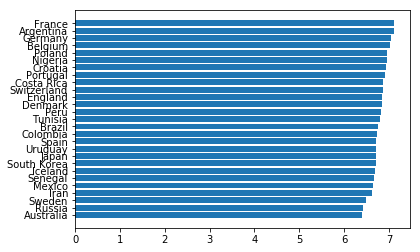

In [43]:
plt.barh(x, df['rating'])
plt.yticks(x, df['Equipo'])

0     6.43
1     6.70
2     6.92
3     6.72
4     6.62
5     7.11
6     6.39
7     6.82
8     6.84
9     7.11
10    6.68
11    6.94
12    6.95
13    6.76
14    6.87
15    6.87
16    7.04
17    6.64
18    6.48
19    6.70
20    7.03
21    6.81
22    6.85
23    6.95
24    6.67
25    6.74
26    6.70
Name: rating, dtype: float64